<a href="https://colab.research.google.com/github/gobova/alligment_parallel_corpus/blob/main/Alignment_fury_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Тексты для выравнивания взяты из готового корпуса: https://github.com/levshina/ParTy-1.0/tree/master/Originals/Fury

## Подгрузим Aligner

In [ ]:
#@title Install

!pip install -U lingtrain-aligner==0.4.3
!pip install razdel dateparser sentence_transformers

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper

## Предобработка текстов

In [ ]:
import re

In [ ]:
with open('Fury_lav.txt', 'r', encoding='utf8') as f:
    text_lav = f.read().split('\n')

with open('Fury_eng.txt', 'r', encoding='utf8') as f:
    text_eng = f.read().split('\n')

In [ ]:
def preproc_text(text):
    preproc_text = []
    for elem in text:
        elem = re.sub(r'\d', '', elem)
        elem = re.sub(r'\d{2}\d{2}\d{2}\d{3}', '', elem)
        elem = re.sub(r'::,', '', elem)
        elem = re.sub(r'\ -->', '', elem)
        elem = re.sub(r'\ufeff', '', elem)
        elem = re.sub(r'\n\n', '\n', elem)
        elem = re.sub(r'^ ', '', elem)
        if len(elem) != 0:
            preproc_text.append(elem)
        else:
            pass

    return(preproc_text)

In [ ]:
lines_lav = preproc_text(text_lav)
lines_eng = preproc_text(text_eng)
lines_eng

['                                   ',
 '                                  ',
 "<i>They're taking fire",
 'from the woods.</i>',
 "<i>They're waiting",
 'for the tanks.</i>',
 '<i>Enemy fire from',
 'our right flank,.</i>',
 '<i>I say again,',
 'our right flank.</i>',
 '<i>Princess Red ',
 'for Culture.</i>',
 '<i>Hold fast. This is',
 'the worst of it, boys. Over.</i>',
 '<i>Sergeant Humphrey',
 'just showed up.</i>',
 '<i>Have you any',
 'information on the right flank?</i>',
 '<i>Culture,',
 "that's a negative.</i>",
 '<i>Move.</i>',
 '<i>This is Able .',
 'The  is in that church.</i>',
 '<i>They threw one at us',
 'when we drove by.</i>',
 'Negative.',
 "It's all over!",
 '<i>Come in, come in.</i>',
 '<i>Do you read me?',
 'Do you read me?</i>',
 'Son of a bitch!',
 'Did you get that fucker?',
 'Knocked him off.',
 'Gordo, stop.',
 'Leave him rest.',
 'Uh-uh.',
 "Gordo, he's dead.",
 "He's dead!",
 'Show some respect',
 'Leave him alone.',
 "He's your fault!",
 'God damn it.',
 "A

In [ ]:
string_lav = " ".join(lines_lav)
string_eng = " ".join(lines_eng)

In [ ]:
lav_com = string_lav.split('.')

In [ ]:
eng_com = string_eng.split('.')

In [ ]:
lav_sentenced = lav_com

In [ ]:
eng_sentenced = eng_com

In [ ]:
def postproc_text(text):
    postproc_text = []
    for elem in text:
        if len(elem) != 0:
            postproc_text.append(elem)
        else:
            pass

    return(postproc_text)

In [ ]:
eng_to_align = postproc_text(eng_sentenced)

In [ ]:
lav_to_align = postproc_text(lav_sentenced)

In [ ]:
type(lav_to_align)

list

In [ ]:
i = 0

for elem in lav_to_align:
    if i == 0:
        with open('lav_to_align.txt', 'w', encoding="utf8") as f:
            f.write(elem + '.' + '\n')
    else:
        with open('lav_to_align.txt', 'a', encoding="utf8") as f:
            f.write(elem + '.' + '\n')
    i += 1

In [ ]:
i = 0

for elem in eng_to_align:
    if i == 0:
        with open('eng_to_align.txt', 'w', encoding="utf8") as f:
            f.write(elem + '.' + '\n')
    else:
        with open('eng_to_align.txt', 'a', encoding="utf8") as f:
            f.write(elem + '.' + '\n')
    i += 1

## Перейдем к выравниванию

In [ ]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
path_to_file = 'lav_to_align.txt'
with open(path_to_file, 'r') as open_file: 
    text1 = open_file.read() # считаем файл в строку

text1 = text1.split("\n")
print("Первые 10 строк:")
for x in text1[:10]:
  print(x)

Первые 10 строк:
ViЕ†us apЕЎauda no meЕѕa.
 Gaida tankus.
 Ienaidnieka uguns mЕ«su labajДЃ flangДЃ.
 "Princese R" - "KultЕ«rai".
 Noturiet pozД«cijas.
 SliktДЃk vairs nebЕ«s.
 Ieradies serЕѕants Hamfrijs.
 Vai ir ziЕ†as par labo flangu? "KultЕ«ra", nav.
 Beidzu.
 "Eibls ".


In [ ]:
#eng - file reading

path_to_file = 'eng_to_align.txt'
with open(path_to_file, 'r') as open_file: 
    text2 = open_file.read() # считаем файл в строку

text2 = text2.split("\n")
print("Первые 10 строк:")
for x in text2[:10]:
  print(x)

Первые 10 строк:
                                                                       <i>They're taking fire from the woods.
</i> <i>They're waiting for the tanks.
</i> <i>Enemy fire from our right flank,.
</i> <i>I say again, our right flank.
</i> <i>Princess Red  for Culture.
</i> <i>Hold fast.
 This is the worst of it, boys.
 Over.
</i> <i>Sergeant Humphrey just showed up.
</i> <i>Have you any information on the right flank?</i> <i>Culture, that's a negative.


In [ ]:
splitter.get_supported_languages()

{'ru': {'name': 'Russian'},
 'zh': {'name': 'Chinese'},
 'de': {'name': 'German'},
 'en': {'name': 'English'},
 'fr': {'name': 'French'},
 'it': {'name': 'Italian'},
 'tr': {'name': 'Turkish'},
 'es': {'name': 'Spanish'},
 'pl': {'name': 'Polish'},
 'pt': {'name': 'Portugal'},
 'hu': {'name': 'Hungarian'},
 'cz': {'name': 'Czech'},
 'jp': {'name': 'Japanese'},
 'ba': {'name': 'Bashkir'},
 'xx': {'name': 'Unknown'}}

In [ ]:
db_path = "full_cycle.db"

lang_from = "lav"
lang_to = "en"

models = ["sentence_transformer_multilingual", "sentence_transformer_multilingual_labse"]
model_name = models[1]

In [ ]:
text1_prepared = preprocessor.mark_paragraphs(text1)
text2_prepared = preprocessor.mark_paragraphs(text2)

In [ ]:
for x in text1_prepared[:10]:
  print (x)

print("-------------------")

for x in text2_prepared[:10]:
  print (x)

ViЕ†us apЕЎauda no meЕѕa%%%%%.
 Gaida tankus%%%%%.
 Ienaidnieka uguns mЕ«su labajДЃ flangДЃ%%%%%.
 "Princese R" - "KultЕ«rai"%%%%%.
 Noturiet pozД«cijas%%%%%.
 SliktДЃk vairs nebЕ«s%%%%%.
 Ieradies serЕѕants Hamfrijs%%%%%.
 Vai ir ziЕ†as par labo flangu? "KultЕ«ra", nav%%%%%.
 Beidzu%%%%%.
 "Eibls "%%%%%.
-------------------
                                                                       <i>They're taking fire from the woods%%%%%.
</i> <i>They're waiting for the tanks%%%%%.
</i> <i>Enemy fire from our right flank,%%%%%.
</i> <i>I say again, our right flank%%%%%.
</i> <i>Princess Red  for Culture%%%%%.
</i> <i>Hold fast%%%%%.
 This is the worst of it, boys%%%%%.
 Over%%%%%.
</i> <i>Sergeant Humphrey just showed up%%%%%.
</i> <i>Have you any information on the right flank?</i> <i>Culture, that's a negative%%%%%.


In [ ]:
splitted_from = splitter.ensure_paragraph_splitting(text1_prepared)
splitted_to = splitter.ensure_paragraph_splitting(text2_prepared)

In [ ]:
if os.path.isfile(db_path):
    os.unlink(db_path)
    
aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

In [ ]:
batch_ids = [0,1]

aligner.align_db(db_path, \
                model_name, \
                batch_size=100, \
                window=40, \
                batch_ids=batch_ids, \
                save_pic=False,
                embed_batch_size=50, \
                normalize_embeddings=True, \
                show_progress_bar=True
                )

batch: 0
Loading LaBSE model from Internet.


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

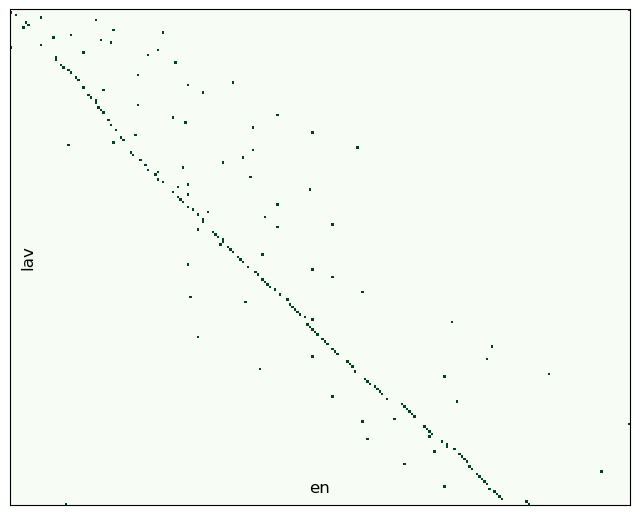

In [ ]:
vis_helper.visualize_alignment_by_db(db_path, output_path="alignment_vis.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(800,800), plt_show=True)

In [ ]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=6, batch_id=-1)

resolver.get_statistics(conflicts_to_solve)
resolver.get_statistics(rest)

conflicts to solve: 18
total conflicts: 28
('3:3', 6)
('2:3', 2)
('5:4', 2)
('5:5', 2)
('6:4', 1)
('5:6', 1)
('4:5', 1)
('6:6', 1)
('3:2', 1)
('4:4', 1)
('5:7', 1)
('17:14', 1)
('7:5', 1)
('11:8', 1)
('18:19', 1)
('13:13', 1)
('8:9', 1)
('5:9', 1)
('9:12', 1)
('2:11', 1)


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

conflicts to solve: 18
total conflicts: 28


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:09<00:00,  1.98it/s]


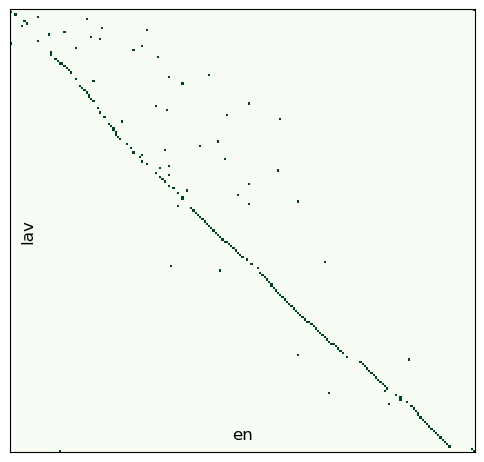

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

conflicts to solve: 5
total conflicts: 7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.02s/it]


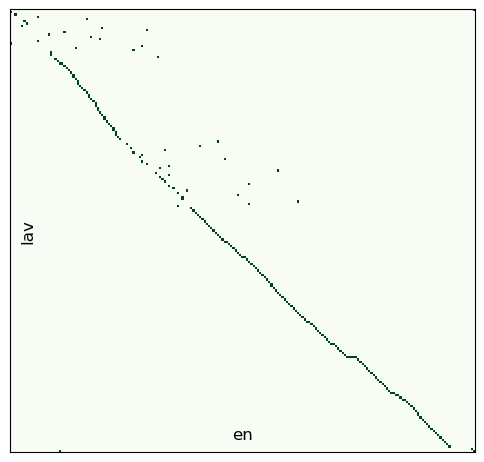

In [ ]:
steps = 2 #3
batch_id = -1 #выровнять все доступные батчи

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    vis_helper.visualize_alignment_by_db(db_path, output_path="img_test1.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(600,600), plt_show=True)

    if len(rest) == 0: break

In [ ]:
output_path = "Gobova_fury_lav_eng.html"
paragraphs_from, paragraphs_to, meta = reader.get_paragraphs(db_path)

In [ ]:
reader.create_book(paragraphs_from, 
                   paragraphs_to, 
                   meta, 
                   output_path, 
                   template="pastel_start")

In [ ]:
from google.colab import files

files.download(output_path) 

ModuleNotFoundError: No module named 'google.colab'